In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
training_dataframe = pd.read_csv('train.csv')
testing_dataframe = pd.read_csv('test.csv')

In [3]:
training_dataframe.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
testing_dataframe.head()

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [5]:
train_x, val_x, train_y, val_y = train_test_split(training_dataframe.pixels, training_dataframe.emotion, test_size=0.15, random_state=30)

In [6]:
def create_dataset(dataframe):
    dataset = []
    for example in dataframe:
        example = example.split(' ')
        dataset.append(example)
    dataset = np.array(dataset)
    dataset = dataset.reshape(-1, 48, 48, 1)
    dataset = dataset.astype(np.float32)
    return dataset

In [7]:
train_x = create_dataset(train_x)

In [8]:
train_x.shape

(24402, 48, 48, 1)

In [9]:
val_x = create_dataset(val_x)

In [10]:
train_y = tf.keras.utils.to_categorical(train_y)

In [11]:
val_y = tf.keras.utils.to_categorical(val_y)

In [12]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))

In [14]:
training_dataset = training_dataset.batch(128)

In [15]:
tf.keras.backend.clear_session()
inputs = keras.Input(shape=(48, 48, 1))

x = layers.Conv2D(16, 3,activation=tf.nn.relu, padding='same')(inputs)
residual_project = layers.Conv2D(16,3 ,activation=tf.nn.relu, padding='same')(x)
x = layers.Conv2D(16,3 ,activation=tf.nn.relu, padding='same')(x)
x = layers.Add()([x, residual_project])
x = layers.Conv2D(16, 3, activation=tf.nn.relu)(xtf)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation=tf.nn.relu)(x)

#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
outputs = layers.Dense(7, activation=tf.nn.softmax)(x)

In [16]:
model = Model(inputs, outputs, name='FRM')

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['acc'])

In [18]:
model.fit(training_dataset, epochs=64, validation_data=(val_x, val_y))

Epoch 1/64
191/191 [==============================] - 9s 48ms/step - loss: 1.9596 - acc: 0.2481 - val_loss: 1.8005 - val_acc: 0.2621
Epoch 2/64
191/191 [==============================] - 9s 45ms/step - loss: 1.7835 - acc: 0.2599 - val_loss: 1.7721 - val_acc: 0.2570
Epoch 3/64
191/191 [==============================] - 9s 45ms/step - loss: 1.7674 - acc: 0.2699 - val_loss: 1.7459 - val_acc: 0.2916
Epoch 4/64
191/191 [==============================] - 9s 45ms/step - loss: 1.7475 - acc: 0.2832 - val_loss: 1.7446 - val_acc: 0.2819
Epoch 5/64
191/191 [==============================] - 9s 45ms/step - loss: 1.7352 - acc: 0.2908 - val_loss: 1.7330 - val_acc: 0.3042
Epoch 6/64
191/191 [==============================] - 9s 46ms/step - loss: 1.7462 - acc: 0.2880 - val_loss: 1.7330 - val_acc: 0.2942
Epoch 7/64
191/191 [==============================] - 9s 45ms/step - loss: 1.7086 - acc: 0.3076 - val_loss: 1.6862 - val_acc: 0.3186
Epoch 8/64
191/191 [==============================] - 8s 44ms/step - 

191/191 [==============================] - 9s 45ms/step - loss: 1.3426 - acc: 0.4780 - val_loss: 1.5265 - val_acc: 0.4177
Epoch 63/64
191/191 [==============================] - 9s 45ms/step - loss: 1.3281 - acc: 0.4827 - val_loss: 1.5243 - val_acc: 0.4249
Epoch 64/64
191/191 [==============================] - 9s 45ms/step - loss: 1.3304 - acc: 0.4840 - val_loss: 1.5194 - val_acc: 0.4263


In [67]:
test_example = val_x[8]

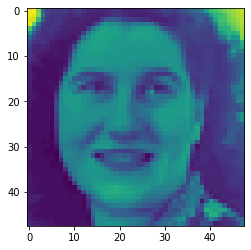

In [68]:
plt.imshow(test_example)

In [71]:
np.argmax(val_y[8])

3

In [72]:
predictions = model(test_example[None,])

In [73]:
np.argmax(predictions)

3